# Data-Clean (Cuong's Session)

## Import CSV file 

In [1]:
import pandas as pd
import numpy as np
import math

test_pd = pd.read_csv('SuperCenterDataNew.csv', header=None, dtype=str)
# add dtype to prevent float
test_pd.head()
print(len(test_pd))
print (test_pd.head)

36881
<bound method NDFrame.head of          0     1     2     3      4      5      6      7      8     9   ...  \
0        39    48   130   147    475   2998   4792   5478   7146  7160  ...   
1        32    48   NaN   NaN    NaN    NaN    NaN    NaN    NaN   NaN  ...   
2        48    79   232   340    396    649    911   1016   1020  1172  ...   
3        32    48    65   130    772    816   1344   3220   4445  6536  ...   
4        39   175   421   806   1025   1629   2424   3151    NaN   NaN  ...   
...     ...   ...   ...   ...    ...    ...    ...    ...    ...   ...  ...   
36876    39   875  2665  2962  12959  14070  14406  15518  16379   NaN  ...   
36877    39    41   101   346    393    413    479    522    586   635  ...   
36878  2310  4267   NaN   NaN    NaN    NaN    NaN    NaN    NaN   NaN  ...   
36879    39    48  2528   NaN    NaN    NaN    NaN    NaN    NaN   NaN  ...   
36880    32    39   205   242   1393    NaN    NaN    NaN    NaN   NaN  ...   

        66   67

## check whether the dataframe has empty rows or not 

In [2]:
def check_blank_rows(df):
    # find rows that all cells are empty or Nan
    blank_rows = df[df.apply(lambda row: row.isnull().all() or (row.astype(str).str.strip() == '').all(), axis=1)]
    
    if blank_rows.empty:
        print("✅ No empty lines.")
    else:
        print(f"⚠️ Found {len(blank_rows)} empty rows")
        print(blank_rows)

    return blank_rows

check_blank_rows(test_pd)

✅ No empty lines.


,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75


## Change the format of dataset from pandas.dataframe to pandas.Series

In [3]:
def is_not_nan(x):
    return x is not None and not (isinstance(x, float) and math.isnan(x))

def merge_and_clean(df):
    # Combine all the value into list, remove NaN cells
    def row_to_clean_list(row):
        # row là 1 Series
        items = []
        for cell in row:
            if isinstance(cell, list):
                items.extend([v for v in cell if is_not_nan(v)])
            elif is_not_nan(cell):
                items.append(int(cell))
        return items

    # Apply for each line
    return df.apply(row_to_clean_list, axis=1)

cleaned = merge_and_clean(test_pd)

# Print result
print(cleaned)
print(type(cleaned))

0        [39, 48, 130, 147, 475, 2998, 4792, 5478, 7146...
1                                                 [32, 48]
2        [48, 79, 232, 340, 396, 649, 911, 1016, 1020, ...
3        [32, 48, 65, 130, 772, 816, 1344, 3220, 4445, ...
4              [39, 175, 421, 806, 1025, 1629, 2424, 3151]
                               ...                        
36876    [39, 875, 2665, 2962, 12959, 14070, 14406, 155...
36877    [39, 41, 101, 346, 393, 413, 479, 522, 586, 63...
36878                                         [2310, 4267]
36879                                       [39, 48, 2528]
36880                             [32, 39, 205, 242, 1393]
Length: 36881, dtype: object
<class 'pandas.core.series.Series'>


In [4]:
def check_all_integers_series(series):
    # function to test integer in the list
    def is_all_int(item_list):
        if not isinstance(item_list, list):
            return False
        return all(isinstance(x, int) for x in item_list)

    # apply test
    invalid_rows = series[~series.apply(is_all_int)]

    if invalid_rows.empty:
        print("✅ All elements are lists with integer particles")
    else:
        print(f"⚠️ Found {len(invalid_rows)} invalid particles")
        print(invalid_rows)

    return invalid_rows

check_all_integers_series(cleaned)

✅ All elements are lists with integer particles


Series([], dtype: object)

### Check duplicate particles in the list of each cart 

In [5]:
def check_duplicate_elements_in_series(series):
    # Return True if the list : lst contain duplication
    def has_duplicates(lst):
        if not isinstance(lst, list):
            return False
        return len(lst) != len(set(lst))  # If exist duplication: len(set()) < len(lst)

    # Apply the check for each row
    duplicated_rows = series[series.apply(has_duplicates)]

    if duplicated_rows.empty:
        print("✅ No duplicated row found.")
    else:
        print(f"⚠️ Found {len(duplicated_rows)} list exist duplication:")
        print(duplicated_rows)

    return duplicated_rows


check_duplicate_elements_in_series(cleaned)

✅ No duplicated row found.


Series([], dtype: object)

## Function to check distribution (existence of item in each cart)

In [6]:
distribution = cleaned.explode().value_counts()

print(distribution)
top_100 = distribution.head(100)

39       21381
48       17930
38        6495
32        6267
41        4391
         ...  
15753        1
14512        1
6240         1
4533         1
16469        1
Name: count, Length: 11799, dtype: int64


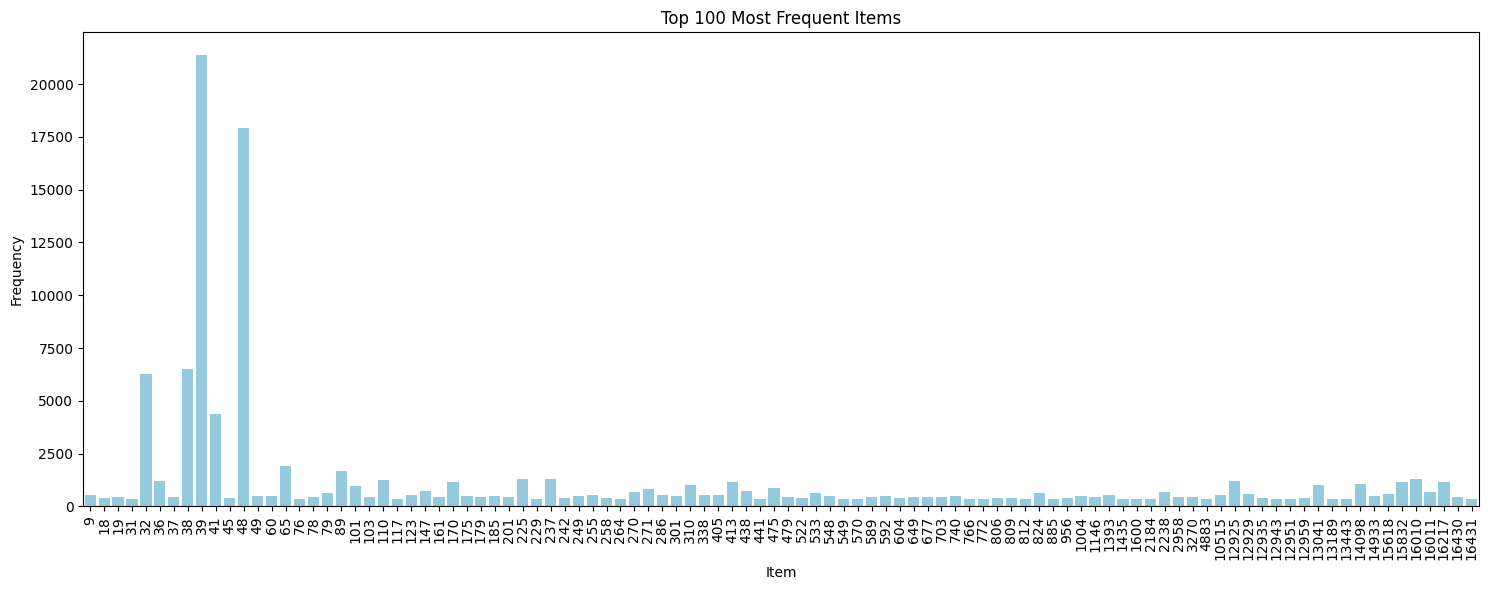

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.barplot(x=top_100.index, y=top_100.values, color='skyblue')

plt.title('Top 100 Most Frequent Items')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
print(cleaned)
cleaned_df = pd.DataFrame({'transaction_id': cleaned.index, 
                          'item': cleaned.values}) # Convert the data cleaned from Series -> familiar pandas format
cleaned_df


0        [39, 48, 130, 147, 475, 2998, 4792, 5478, 7146...
1                                                 [32, 48]
2        [48, 79, 232, 340, 396, 649, 911, 1016, 1020, ...
3        [32, 48, 65, 130, 772, 816, 1344, 3220, 4445, ...
4              [39, 175, 421, 806, 1025, 1629, 2424, 3151]
                               ...                        
36876    [39, 875, 2665, 2962, 12959, 14070, 14406, 155...
36877    [39, 41, 101, 346, 393, 413, 479, 522, 586, 63...
36878                                         [2310, 4267]
36879                                       [39, 48, 2528]
36880                             [32, 39, 205, 242, 1393]
Length: 36881, dtype: object


,transaction_id,item
0,0,"[39, 48, 130, 147, 475, 2998, 4792, 5478, 7146..."
1,1,"[32, 48]"
2,2,"[48, 79, 232, 340, 396, 649, 911, 1016, 1020, ..."
3,3,"[32, 48, 65, 130, 772, 816, 1344, 3220, 4445, ..."
4,4,"[39, 175, 421, 806, 1025, 1629, 2424, 3151]"
...,...,...
36876,36876,"[39, 875, 2665, 2962, 12959, 14070, 14406, 155..."
36877,36877,"[39, 41, 101, 346, 393, 413, 479, 522, 586, 63..."
36878,36878,"[2310, 4267]"
36879,36879,"[39, 48, 2528]"


# Apriori Algorithm Implementation
- The Clean Data was storing in `cleaned_df` variable - it's better for you to have the back-up of stored cleaned csv file of this dataframe obj
- The Apriori Algorithm include 2 important step
- Step 1: Builiding the sets of frequent items (the most computational & memory expensive step)
- Step 2: Rule conversion (basing on found frequent-item sets) 
- So this repo would show 4 differrent implements of the step 1 (include 3 improved versions versus 1 conventional algorithm) while keeping the step 2 still & measure the number of rules being deduced

## Cuong's Session (TROY-ID NUMBER)

In [ ]:
"""
Commentarty Section (Necessary)

Provide a brief commentary describing what your code is intended to implement. Focus on the main logic or algorithm behind it. You may include a high-level overview or pseudocode to outline the steps. This helps clarify your thought process before writing the actual code.

4. Improved Version in building Item-Sets based-on (Yuan, 2017) [https://doi.org/10.1063/1.4977361]

    -> The enhancement of this -> storing the TID by using compacted vector structure
    -> Storing the occurence of object using bit-str values 
    Input:
        T: List of transactions
        min_sup: Minimum support threshold

    Output:
        All frequent itemsets (Answer)

    Procedure:

    1. // Step 1: Generate frequent 1-itemsets with transaction IDs
    L1 = find_frequent_1_itemsets(T)

    2. // Step 2: Generate candidate 2-itemsets using self-join
    C2 = join_pairs(L1)
    L2 = { c in C2 | support(c) ≥ min_sup }

    3. Initialize:
    Answer = L1 ∪ L2
    k = 3

    4. // Step 3: Iteratively generate Lk
    While L(k-1) is not empty:
    
        // 3.1: Prune infrequent items from L(k-1)
        L(k-1) = Prune(L(k-1))

        Ck = ∅
        
        // 3.2: Generate candidate k-itemsets from L(k-1)
        For each pair (Lx, Ly) in L(k-1):
            If first (k−2) items in Lx and Ly are equal AND Lx[k−1] < Ly[k−1]:
                c = union(Lx, Ly)

                // Ensure all (k−1)-subsets of c exist in L(k-1)
                If any (k−1)-subset of c is not in L(k-1):
                    skip this candidate
                Else:
                    add c to Ck

        // 3.3: Count support using TID set intersection
        Lk = []
        For each candidate c in Ck:
            c.TIDs = intersection of TID sets from subsets of c
            c.support = size of c.TIDs

            If c.support ≥ min_sup:
                Lk.append(c)

        // 3.4: Final pruning of Lk
        For each itemset Lj in Lk:
            If count of items from L1 in Lj < k:
                remove Lj from Lk

        Answer = Answer ∪ Lk
        k = k + 1

    5. Return Answer


"""

## An's Session (TROY-ID NUMBER)

In [ ]:
"""
Commentarty Section (Necessary)

Provide a brief commentary describing what your code is intended to implement. Focus on the main logic or algorithm behind it. You may include a high-level overview or pseudocode to outline the steps. This helps clarify your thought process before writing the actual code.

1. Conventional K-Item Set generation: (Mentioned in the course)

    L = []
    Define the target the size you want to generate: N
    Define the minimum abs support k
    For i = 1, i < N , i ++:
        Build the mapping (M) contain item-set with size i:
        if i == 1:
            
            For all record in transaction tables:
                For items in Transaction:
                    if item in M:
                        M[item] += 1
            Build the mapping L1
            For all item in M:
                if M[item] >= k :
                    L1[item] = M[item]

            L.append(L1)
            
        else:
            Build the mapping (M) contain item-set with size i:
            C_k = candidate_gen(L[i-2]) # Generating all candidate with size i > 1 (generating i - 1 items sets)

            For all record in transaction tables:
                For candidate in C_k:
                    if candidate is subset of record:
                        M[candidate] += 1
            Build the mapping Lk
            For all candidate in M:
                if M[candidate] >= k:
                    Lk[candidate] = M[candidate]
            
            If (Len(Lk) <=1):
                break
        
            L.append(Lk)
    return L

    Given: 
    candidate_gen(L_prev):
        Ck = []

        // L_prev -> a list of (k-1)- itemset
        for each pair (A,B) in L_prev:
            if A and B share the 1st (k-2) items:
                C = A U B
                all_sub_frequent = True
                for subset in combination(C):  // check all (k-1)-subsets made from C  
                    if subset not in L_prev:
                        all_sub_frequent = False
                        break
                if all_sub_frequent:
                    Ck.append(C)



"""

## Dung's Session (TROY-ID NUMBER)

In [ ]:
"""
Commentarty Section (Necessary)

Provide a brief commentary describing what your code is intended to implement. Focus on the main logic or algorithm behind it. You may include a high-level overview or pseudocode to outline the steps. This helps clarify your thought process before writing the actual code.

2. Improved Version based-on (Al-Maolegi & Arkok, 2014) [https://arxiv.org/pdf/1403.3948]

    Input:
            T: List of transactions
            min_sup: Minimum support threshold

    Output:
            All frequent itemsets (Answer)

    Answer = []

    L1 = find the frequent set of items with size 1 base on Transaction Table T
    Answer.append(L1)

    Define Lk the itemset with size k
    Lk-1 = L1
    For k = 2, Lk-1 != null ; k++:
        # Possible Candidate with size k & their posisble Support values
        Ck = generate_candidates(Lk-1) 
        
        For candidate in Ck:
            min_item = find item with min support in candidate based on L1

            // get transaction that contain min_item (stored in memory)
            relevant_transactions = get_transaction(min_item, L1)
            
            for t in relevant_transactions:
                include_in_t = True
                for element in candidate:
                    if element not in t:
                        include_in_t = False
                if include_in_t = True:
                    Support(Ck)+=1
        Lk = filter_candidate_by_support(Ck, min_support)
        Answer.append(Lk)
        Lk_minus_1 = Lk

    return Answer



"""

## Dat's Session (1677589)

In [ ]:
"""
Commentarty Section (Necessary)

# My Final Target - Implement the K-Item Set generation step in Apripory Algorithm

=> Additional Constrain: the size: within a plausible size (no clear-definition)
-> the values of support -> Using Absolute Support as input
-> the minimum-support range [3,10] for the dataset



3. Improved Version in building the Item-Sets based-on (Lang, 2018) [https://doi.org/10.1063/1.5033777]
    Input:
        T: list of transactions
        min_sup: minimum support threshold (as percentage)

    Output:
        All frequent itemsets

    Procedure:

        1. // Step 1: Create Boolean matrix S from transaction database
        S = boolean_matrix(T)  // rows = transactions, columns = items # This will be light-weight than using the original dataset

        2. // Step 2: Calculate support count for each item (column sum)
        For each item j in S:
            support[j] = sum(S[:, j])
        Prune items with support < min_sup_count → generate L'1

        3. // Step 3: Calculate item weight
        For each item j:
            P[j] = 1 / (support[j] / N)

        4. // Step 4: Calculate transaction weight
        For each transaction i:
            PT[i] = average(P[j]) for all items j in T[i]

     
        5. // Step 5: Calculate weighted support of each item
        For each item j:
            PS[j] = sum of PT[i] where item j ∈ T[i] / sum of all PT
        Prune items with PS < min_sup → generate L1

        6. // Step 6: Generate candidate 2-itemsets C2 via self-join of L1
        For each pair (i, j) in L1:
            TID[i ∩ j] = AND(S[:, i], S[:, j])
            count[i,j] = sum(TID[i ∩ j])
            PS[i,j] = sum(PT[i]) / total PT

        Generate L'2 (by count), L2 (by PS)
        Prune: L2_final = L'2 ∩ L2 # if the the itemsets pass both criteria -> keep, else drop

        7. // Step 7: Repeat for k-itemsets (k ≥ 3)
        While Lk is not empty:
            Ck+1 = self-join(Lk)
            For each candidate c in Ck+1:
                Perform AND over all columns in c in S → count support
                Calculate PS(c)
            Generate L'k+1 and Lk+1
            Prune: L_final = L'k+1 ∩ Lk+1

        8. Stop when no new candidates can be generated
        Return all frequent itemsets

"""


### Building the Transactional Matrix

In [65]:
"""
    the transasctional matrix (T_mat) define as 2D matrix n by m
    n transactions (rows)
    m unique items (col)
    each cell: aij - a binary values: 
        1: item j in transaction i
        0: not in the transaction
    
"""


import pandas as pd
import ast
import numpy as np
from itertools import combinations
from scipy.stats import skew


class WeightedApriori:
    def __init__(self, df, min_support=3):
        self.cleaned_df = df.copy()
        self.min_support = min_support
        self.num_transact = df.shape[0]

        self.item_to_id = {}
        self.id_to_item = {}

        self.T_mat = None # Transactional Matrix
        self.S_vec = None # Support Vector
        self.F_items = None # Frequent Items
        self.item_weights = None
        self.transaction_weights = None
        self.L1_items = None
        self.L1_weight_support = None
        self.L1_support = None
        self.support = None # support of all items before L1 pruning

        
    def creating_transact_mat_support_vec(self):
        """
        
        - Returns transactional matrix (T_mat)
        - Returns filtered support vector (S_vec)
        - Returns frequent items (F_items)
        """
        self.cleaned_df["item_list"] = self.cleaned_df["item"].apply(ast.literal_eval)

        unique_items = sorted({item for sublist in self.cleaned_df["item_list"] for item in sublist})
        self.item_to_id = {item: idx for idx, item in enumerate(unique_items)}
        self.id_to_item = {idx: item for item, idx in self.item_to_id.items()}

        T = np.zeros((self.num_transact, len(unique_items)), dtype=int)
        for i, item_list in enumerate(self.cleaned_df["item_list"]):
            for item in item_list:
                j = self.item_to_id[item]
                T[i, j] = 1

        support = T.sum(axis=0)
        mask = support >= self.min_support

        self.S_vec = support[mask]
        self.T_mat = T[:, mask]
        self.F_items = [unique_items[i] for i in np.where(mask)[0]]
        self.support_val = self.T_mat.sum(axis=0)/ self.num_transact

        return self.T_mat, self.S_vec, self.F_items, self.support_val

    def calculate_item_transact_weight(self):
        self.item_weights = self.num_transact / self.S_vec

        numerator = self.T_mat @ self.item_weights
        denominator = self.T_mat.sum(axis=1)
        denominator[denominator == 0] = 1

        self.transaction_weights = numerator / denominator
        return self.item_weights, self.transaction_weights

    def weight_support_and_prune(self):
        total_weight = sum(self.transaction_weights)
        weight_support = (self.T_mat.T @ self.transaction_weights) / total_weight
        weight_support = weight_support.tolist()

        relative_threshold = self.min_support / self.num_transact
        L1 = [(item, ps) for item, ps in zip(self.F_items, weight_support) if ps >= relative_threshold]

        self.L1_items = [item for item, _ in L1]
        self.L1_weight_support = [ps for _, ps in L1]

        # Filter unweighted support for L1 items only
        mask_L1 = [item in self.L1_items for item in self.F_items]
        self.L1_support = self.support_val[mask_L1] # Use from self.support_val

        return self.L1_items, self.L1_weight_support, self.L1_support

    def generate_k_itemsets(self, k, prev_L_items):
        """
        Generate frequent k-itemsets from (k-1)-itemsets using:
        - Matrix logic (Boolean AND across columns)
        - Weighted support
        - Absolute support count

        Returns:
            Lk_items: list of frequent k-itemsets
            Lk_weight_support: list of corresponding weighted supports
            Lk_support: the relative support values of the itemsets
        """
        # Mapping the items to columns indices (for new itemsets)
        item_to_idx = {item: idx for idx, item in enumerate(self.L1_items)}
        
        # Generate candidate k-itemsets from (k-1) itemsets
        candidates = set()
        for a,b in combinations(prev_L_items, 2):
            union = tuple(sorted(set(a) | set(b)))
            if len(union) == k: # if the candidate have the len = k
                candidates.add(union)

        transaction_mat = self.T_mat
        transaction_weight = self.transaction_weights
        num_tract = self.num_transact
        total_transactional_weight = transaction_weight.sum()

        Lk_items = []
        Lk_weight_support = []
        Lk_support = []

        for cand in candidates:
            # Find column indices for each item in candidate
            try:
                col_indices = [item_to_idx[item] for item in cand]
            except KeyError:
                continue

            # Compute row-wise AND in the transactional matrix
            intersect = transaction_mat[:, col_indices].all(axis=1).astype(int)

            # Absolute support count
            abs_support = intersect.sum()

            if abs_support < self.min_support: # Drop if the support of the candidate < min_support
                continue

            # Weighted support calculation
            weighted_support = (intersect * transaction_weight).sum() / total_transactional_weight

            relative_threshold = self.min_support / num_tract
            if weighted_support >= relative_threshold:
                Lk_items.append(cand)
                Lk_weight_support.append(weighted_support * 100.0)
                Lk_support.append(abs_support/self.num_transact)
        
        return Lk_items, Lk_weight_support, Lk_support

    def gen_full_itemsets(self, max_k=5):
        """
        Run the full Weighted Apriori algorithm until no more frequent itemsets are found.


        Returns:
            all_frequent_itemsets: list of tuples (itemset, weighted_support)
        """
        self.creating_transact_mat_support_vec()
        self.calculate_item_transact_weight()
        self.weight_support_and_prune()

        current_L = [(item,) for item in self.L1_items]
        current_weight_support = self.L1_weight_support
        

        all_frequent_itemsets = list(zip(current_L, current_weight_support, self.L1_support.tolist()))

        k = 2
        while current_L and k <= max_k:
            print(f"Generating L{k}...")
            current_L, current_weight_support, current_support = self.generate_k_itemsets(k, current_L)

            if not current_L:
                break

            all_frequent_itemsets.extend(zip(current_L, current_weight_support, current_support))
            k += 1

        return all_frequent_itemsets





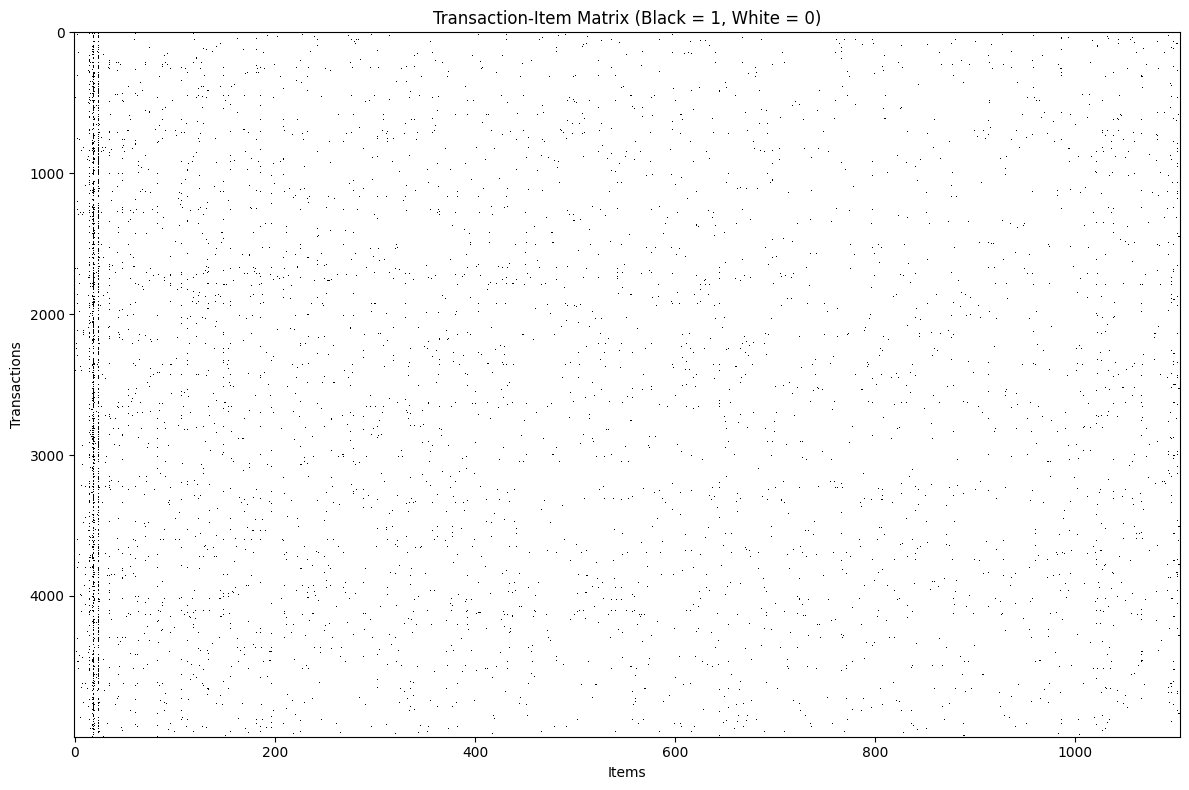

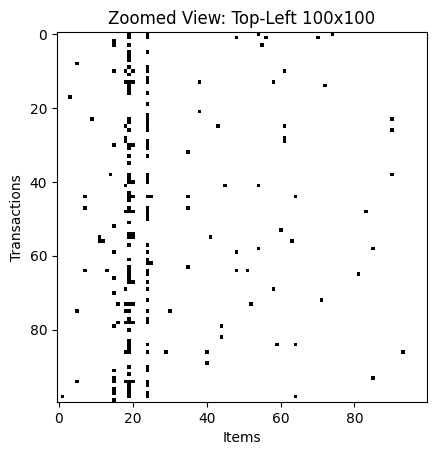

In [66]:
# cleaned_df.shape
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler


cleaned_df = pd.read_csv("backup_checkpoint.csv", index_col=0)
cleaned_df_5000 = cleaned_df.sample(n=5000) # sampling take 5000 random samples
model_5000 = WeightedApriori(cleaned_df_5000, min_support=10)

T_mat, S_vec, F_items, support_val = model_5000.creating_transact_mat_support_vec()




# Plot with imshow (much faster for large matrices)
plt.figure(figsize=(12, 8))
plt.imshow(T_mat, aspect='auto', cmap='binary', interpolation='nearest')
plt.title("Transaction-Item Matrix (Black = 1, White = 0)")
plt.xlabel("Items")
plt.ylabel("Transactions")
plt.tight_layout()
plt.show()

# Zoom into the first 100 transactions and first 100 items
plt.imshow(T_mat[:100, :100], cmap='binary', interpolation='nearest')
plt.title("Zoomed View: Top-Left 100x100")
plt.xlabel("Items")
plt.ylabel("Transactions")
plt.show()

# # Zoom into the first 100 transactions and first 100 items
# plt.imshow(T_mat_5000[:100, :100], cmap='binary', interpolation='nearest')
# plt.title("Zoomed View: Top-Left 100x100 with 5000 Sampled Transactions")
# plt.xlabel("Items")
# plt.ylabel("Transactions")
# plt.show()

In [115]:
item_sets = model_5000.gen_full_itemsets(max_k=5)


Generating L2...
Generating L3...
Generating L4...
Generating L5...


In [ ]:
from itertools import combinations

# Convert relative support to absolute support
support_dict = {
    frozenset(element[0]): round(element[2] * model_5000.num_transact,2)
    for element in item_sets
}



# Call the rule generator
min_confidence = 0.5
rules = generate_association_rules(item_sets, min_confidence, support_dict)

# Print support dict
# print("== Absolute Supports ==")
# for key, value in support_dict.items():
#     print(f"{key} : {value:.2f}")

# Print rules
print(f"\n== Association Rules (min_confidence = {min_confidence}) ==")
for antecedent, consequent, confidence, _ in rules:
    print(f"{antecedent} => {consequent} (confidence = {confidence:.4f})")


== Association Rules (min_confidence = 0.5) ==
(309,) => (1379,) (confidence = 0.6250)
(1379,) => (309,) (confidence = 0.8333)
(3311,) => (39, 1819) (confidence = 0.5500)
(39, 1819) => (3311,) (confidence = 0.9167)
(308,) => (1380,) (confidence = 0.5882)
(1380,) => (308,) (confidence = 0.7143)
(309,) => (1378,) (confidence = 0.6250)
(1378,) => (309,) (confidence = 0.6667)
(1819,) => (39, 3311) (confidence = 0.5500)
(39, 3311) => (1819,) (confidence = 0.7857)
(308,) => (1269,) (confidence = 0.8235)
(1269,) => (308,) (confidence = 0.6667)
(308,) => (1080,) (confidence = 0.5882)
(1080,) => (308,) (confidence = 0.6667)
(1818,) => (3311,) (confidence = 0.7692)
(3311,) => (1818,) (confidence = 0.5000)
(1819,) => (3311,) (confidence = 0.7500)
(3311,) => (1819,) (confidence = 0.7500)
(1380,) => (1269,) (confidence = 0.7143)
(3021,) => (3055,) (confidence = 0.5556)
(3055,) => (3021,) (confidence = 0.5882)
(1080,) => (1269,) (confidence = 0.6667)
(309,) => (1269,) (confidence = 0.6250)
(166,) =

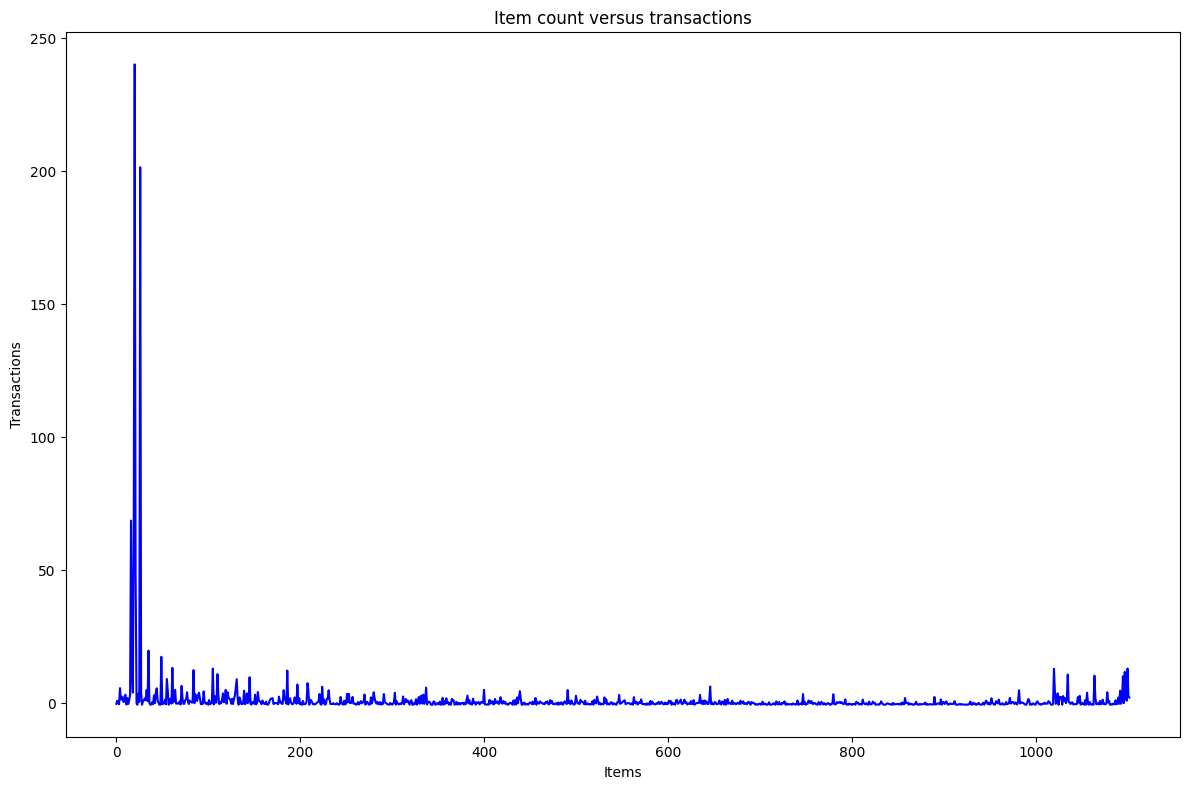

In [55]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

item_counts = T_mat.sum(axis =0)
item_counts_df = pd.DataFrame({
    "items": range(len(item_counts)),
    "item_count": item_counts
})
scaler = RobustScaler()
item_counts_scaled = scaler.fit_transform(item_counts_df[["item_count"]])
item_counts_df["item_count_scaled"] = item_counts_scaled

plt.figure(figsize=(12, 8))
# plt.imshow(T_mat_df, aspect='auto', cmap='binary', interpolation='nearest')
plt.plot(item_counts_df["item_count_scaled"], label="Original", color='blue')
plt.title("Item count versus transactions")
plt.xlabel("Items")
plt.ylabel("Transactions")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd 
# Storing for fast backup
cleaned_df.to_csv("backup_checkpoint.csv")


## Apriory Rule's Mining (Dat's Work)

In [ ]:
def generate_association_rules(frequent_itemsets, min_confidence, support_dict):
    """
    Args:
        frequent_itemsets: list of tuples (itemset_tuple, support_weight, raw_support)
        min_confidence: float
        support_dict: dict mapping frozenset(itemset) -> absolute support value

    Returns:
        rules: list of tuples (antecedent, consequent, confidence)
    """
    rules = []

    for itemset, _, support in frequent_itemsets:
        itemset_set = frozenset(itemset)
        itemset_support = support_dict.get(itemset_set, 0)
        n = len(itemset)
        if n < 2:
            continue

        for i in range(1, n):
            for antecedents in combinations(itemset, i):
                antecedent_set = frozenset(antecedents)
                consequent_set = itemset_set - antecedent_set

                if not consequent_set:
                    continue

                antecedent_support = support_dict.get(antecedent_set)
                consequent_support = support_dict.get(consequent_set)
                if not antecedent_support or not consequent_support: # not form if 1 of those side of rule is infrequent
                    continue

                confidence = itemset_support / antecedent_support
                lift = confidence / (consequent_support / model_5000.num_transact) # this is : confident(A->B) / (support(B) / #Transaction) -> Math 
                if confidence >= min_confidence:
                    rules.append((
                        tuple(sorted(antecedent_set)),
                        tuple(sorted(consequent_set)),
                        round(confidence, 4),
                        round(lift,4)
                    ))
    # sort rules by descending lift
    rules.sort(key=lambda x: x[3], reverse=True) # the strength of association rule
    return rules